In [1]:
import torch
import numpy
import pandas as pd
import os
import random
import transformer_lens.utils as utils
from transformer_lens import ActivationCache, HookedTransformer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
main_path = '../mean_ablated_predictions/'
heads_layers_files = os.listdir(main_path)
if '.DS_Store' in heads_layers_files:
    heads_layers_files.remove('.DS_Store')

In [3]:
len(heads_layers_files)

1248

In [45]:

main_pred = pd.read_csv('../dataset_csvs_singular_plural/predictions/correct_preds_xl_s_plural.csv')
non_ablated_preds = main_pred['predictions'].tolist()
main_prob = pd.read_csv('../dataset_csvs_singular_plural/predictions/correct_preds_xl_s_plural.csv')['probabilities'].mean()

true_preds_per_file = []
common_elements_per_file = []
count_common_per_file = []
more_or_less_true = []
layer = []
head = []
names_temp_true_preds_per_file = []
per_file_prob = []
prob_diff = []
for inde, file_name in enumerate(heads_layers_files):
    print(inde, file_name)
    temp_count = 0
    temp_true_preds = []
    temp = pd.read_csv(main_path + file_name)
    for i, row in temp.iterrows():
        plural = row['plural']
        pred = row['prediction']
        if plural == pred[1:]:
            temp_count += 1
            temp_true_preds.append(pred[1:])
    
    
    true_preds_per_file.append(temp_count)
    names_temp_true_preds_per_file.append(temp_true_preds)
    common_elements = set(non_ablated_preds).intersection(temp_true_preds)
    common_elements_per_file.append(list(common_elements))
    count_common = len(common_elements)
    count_common_per_file.append(count_common)
    more_or_less_true.append(len(non_ablated_preds) - count_common)
    split_values = file_name.split('_')
    
    if split_values[-2] == 'layer':
        layer.append(int(split_values[-1].split('.')[0]))
        head.append(-1)
    else:
        head.append(int(split_values[-1].split('.')[0]))
        layer.append(split_values[-2])
    temp_prob = temp['probability'].mean()
    per_file_prob.append(temp_prob)
    prob_diff.append(main_prob - temp_prob)




0 predictions_s_plural_XL_layer_2_24.csv
1 predictions_s_plural_XL_layer_10_3.csv
2 predictions_s_plural_XL_layer_11_14.csv
3 predictions_s_plural_XL_layer_36_0.csv
4 predictions_s_plural_XL_layer_43_20.csv
5 predictions_s_plural_XL_layer_46_9.csv
6 predictions_s_plural_XL_layer_18_24.csv
7 predictions_s_plural_XL_layer_5_11.csv
8 predictions_s_plural_XL_layer_16_21.csv
9 predictions_s_plural_XL_layer_2_18.csv
10 predictions_s_plural_XL_layer_18_18.csv
11 predictions_s_plural_XL_layer_8_6.csv
12 predictions_s_plural_XL_layer_44_15.csv
13 predictions_s_plural_XL_layer_37_10.csv
14 predictions_s_plural_XL_layer_30_19.csv
15 predictions_s_plural_XL_layer_6_9.csv
16 predictions_s_plural_XL_layer_39_15.csv
17 predictions_s_plural_XL_layer_27_8.csv
18 predictions_s_plural_XL_layer_12_1.csv
19 predictions_s_plural_XL_layer_34_2.csv
20 predictions_s_plural_XL_layer_27_15.csv
21 predictions_s_plural_XL_layer_29_7.csv
22 predictions_s_plural_XL_layer_29_10.csv
23 predictions_s_plural_XL_layer_20

In [46]:
len(non_ablated_preds)

80

In [47]:
df = pd.DataFrame({
    'names_temp_true_preds_per_file':names_temp_true_preds_per_file,
    'true_preds_per_file':true_preds_per_file,
    'common_elements_per_file':common_elements_per_file,
    'count_common_per_file':count_common_per_file,
    'more_or_less_true':more_or_less_true,
    'layer':layer,
    'head':head,
    'per_file_prob':per_file_prob,
    'prob_diff':prob_diff
    
})

In [48]:
df.shape

(1248, 9)

In [49]:
df.to_csv('../dataset_csvs_singular_plural/predictions/layer_head_analysis.csv')

In [50]:
df['count_common_per_file'].unique()

array([80, 79])

In [51]:
len(non_ablated_preds)

80

In [52]:
df[df['count_common_per_file'] == 79]

,names_temp_true_preds_per_file,true_preds_per_file,common_elements_per_file,count_common_per_file,more_or_less_true,layer,head,per_file_prob,prob_diff
527,"[cats, dogs, books, chairs, houses, cars, appl...",80,"[stars, places, models, birds, cats, doctors, ...",79,1,14,-1,0.389668,0.054936
590,"[cats, dogs, books, chairs, houses, cars, appl...",79,"[stars, places, models, birds, cats, doctors, ...",79,1,0,-1,0.393097,0.051506


In [56]:
df['prob_diff'].max(), df['prob_diff'].min()

(0.05735590334571017, 0.051506380535896845)

In [55]:
df[df['prob_diff'] == 0.05735590334571017]

,names_temp_true_preds_per_file,true_preds_per_file,common_elements_per_file,count_common_per_file,more_or_less_true,layer,head,per_file_prob,prob_diff
924,"[cats, dogs, books, chairs, houses, cars, appl...",80,"[stars, places, models, birds, cats, doctors, ...",80,0,22,-1,0.387247,0.057356


In [57]:
df[df['prob_diff'] == 0.051506380535896845]

,names_temp_true_preds_per_file,true_preds_per_file,common_elements_per_file,count_common_per_file,more_or_less_true,layer,head,per_file_prob,prob_diff
590,"[cats, dogs, books, chairs, houses, cars, appl...",79,"[stars, places, models, birds, cats, doctors, ...",79,1,0,-1,0.393097,0.051506


<Axes: >

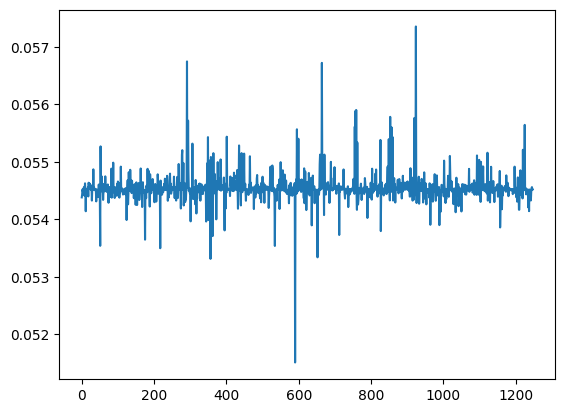

In [58]:
df['prob_diff'].plot()